# **Tutorial: Random Walk Hypothsis** 

## By Kostas Hatalis 

# Topics:

1. White Noise
2. Random Walks
3. Differencing and Residual Series
4. Histogram of a Series
    -   Monte Carlo Analysis of Random Walks
5. Autocorrelation of a Series
6. Random Walk Hypothesis
7. Analysis of Apple Stock

# 1. White Noise 

Consider a time series $ w_t $ for $t = 1,...,n$ . If the elements of the series, $w_i$, are independent and identically distributed (iid), with a mean of zero, variance $ \sigma^2 $ and have no serial correlation Cor$(w_i,w_j) \neq 0, \forall i \neq j$ (this means that a past point does not affect a future point) then we say that the time series is white noise.

In particular, if the values $w_i$ are drawn from a standard normal distribution (i.e. $w_t ∼ N(0,\sigma^2)$), then the series is known as Gaussian White Noise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
w = np.random.randn(100,1)

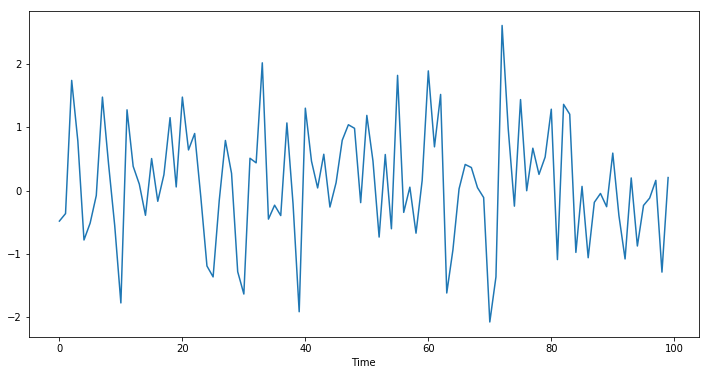

In [18]:
plt.figure(figsize=(12,6))
plt.plot(w);
plt.xlabel('Time');

# 2. Random Walks

A random walk is a time series model where the current observation is equal to the previous observation plus with a random step up or down. A random walk is a time series model $x_t$
such that $x_t=x_{t−1}+w_t$, where $w_t$ is a discrete white noise series.

And stepping back further:
$ x_{t−1} = x_{t−2}+w_{t−1} $

$ x_{t} = x_{t−2}+w_{t−1}+w_t  $

$ x_{t−2} = x_{t−3}+w_{t−2} $

$ x_{t} = x_{t−3}+w_{t−2}+w_{t−1}+w_t  $

If we repeat this process until the end of the time series we get:
$ x_t=w_{t}+w_{t−1}+w_{t−2}+w_{t−3}... $

Hence it is clear to see how the random walk is simply the sum of the elements from a discrete white noise series. 

There is NO WAY to predict random walks!

In [39]:
x = np.zeros((1000,1))
for t in range(1,1000):
    x[t] = x[t-1] + np.random.randn(1)

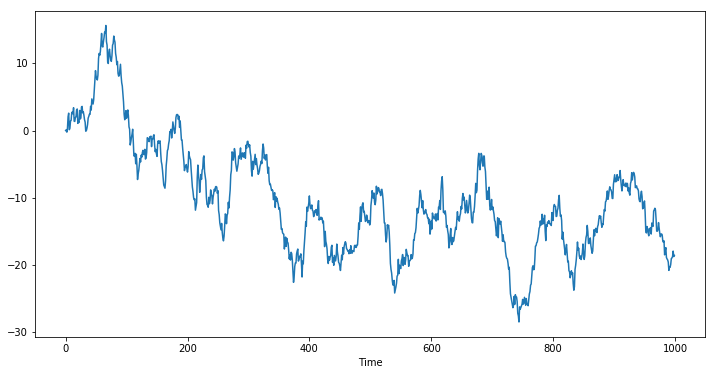

In [40]:
plt.figure(figsize=(12,6))
plt.plot(x);
plt.xlabel('Time');

# 3. Differencing \& Residual Series

Residual: a quantity remaining after other things have been subtracted or allowed for.

A residual series is simply the remainder after you've done some operation to an original series.

Here we're going to create a differenced series $y_t = x_t - x_{t-1}$. This is our residual series.

According to our theory above this residual series should be white noise!

In [31]:
y = np.diff(x, axis = 0)

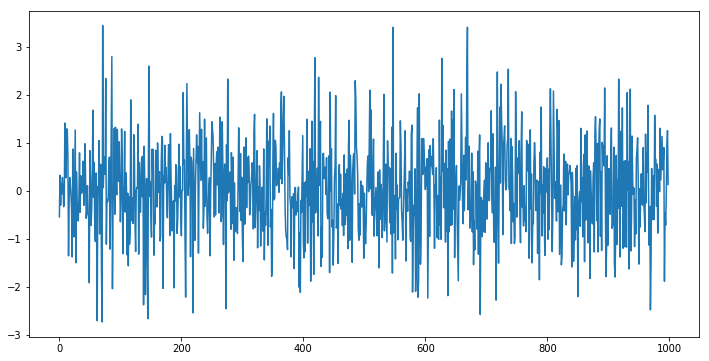

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y);

# 4. Histogram of Residual Series

Our residual series should have a histogram that looks like a Normal distribution with mean close to 0 and standard deviation close to 1.

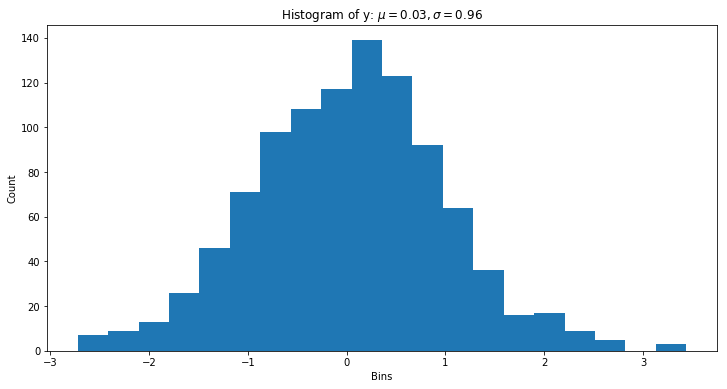

In [34]:
# the histogram of the data
plt.figure(figsize=(12,6))
plt.hist(y, bins = 20);

# add labels
plt.xlabel('Bins');
plt.ylabel('Count');
plt.title(r'Histogram of y: $\mu = $'+str(round(np.mean(residual),2))+'$, \sigma=$'+str(round(np.std(residual),2)));

# 5. Monte Carlo Analysis of Random Walks

Monte Carlo analysis is simply the repeated random sampling of some experiment, getting individual results, and then averaging all those results or running some other statistical analysis over all the results.

Here we are going to create 1000 random walks and then analyze the histogram across the residuals of all those walks.

In [41]:
# simulate 1000 random walks
y = np.zeros((1000,1000))
for i in range(1000):
    for t in range (1,1000):
        y[t,i] = y[t-1,i] + np.random.randn(1)

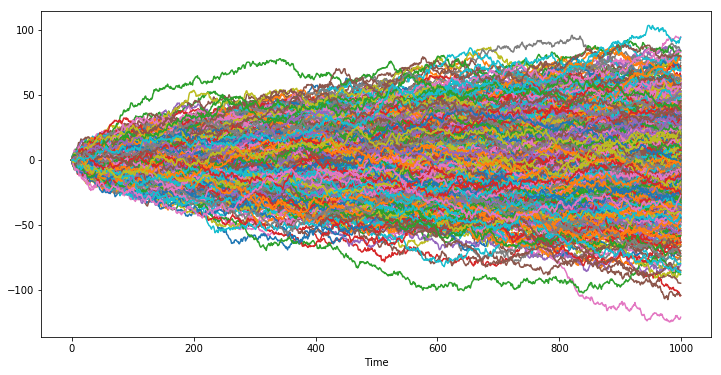

In [42]:
# plot 1000 walks (maybe slow on some computers)
plt.figure(figsize=(12,6))
plt.plot(y);
plt.xlabel('Time');

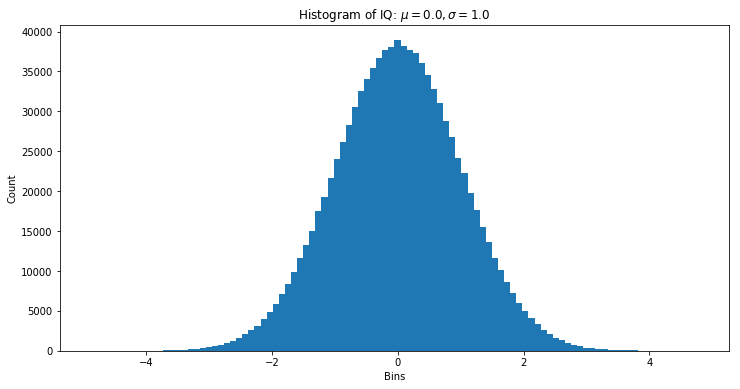

In [43]:
residual = np.diff(y, axis = 0) # create residual series

# the histogram of the data
plt.figure(figsize=(12,6))
plt.hist(residual.flatten(), bins = 100); # take hist across all data

# add labels
plt.xlabel('Bins');
plt.ylabel('Count');
plt.title(r'Histogram of IQ: $\mu = $'+str(round(np.mean(residual),2))+'$, \sigma=$'+str(round(np.std(residual),2)));

What did we learn?

# 6. Random Walk Hypothesis: Example on Apple Stock

The random walk hypothesis is a financial theory stating that says stock market prices evolve according to a random walk (ie price changes are random) and thus cannot be predicted from past prices. 

Let's put it to the TEST with what we learned!

We check for two things:

1. are the residuals (here we model returns) iid?
2. are the residuals autocorrelated? (I'll explain the math behind this in another session)

In [44]:
# load in libraries again (just in case)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# load Apple stock data from AAPL.csv (don't worry if this code looks exotic)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [46]:
data.head() # print first few data points

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-18,78.000000,78.741432,77.944283,77.998573,68.972733,65062900
2014-02-19,77.821426,78.127144,76.335716,76.767143,67.883812,78442000
2014-02-20,76.141426,76.714287,75.571426,75.878571,67.098045,76464500
2014-02-21,76.112854,76.367142,74.942856,75.035713,66.352722,69696200
2014-02-24,74.735718,75.702858,74.631432,75.364288,66.643288,72227400


## Is the daily return of Apple white noise?

$p_t$ is the closing price of Apple stock for day $t$.

price return = $\frac{p_{t}}{p_{t-1}-p_{t}} = \frac{p_{t}}{p_{t-1}} - 1$

Benefit of using returns, versus prices, is normalization: measuring all variables in a comparable metric. 

This enables evaluation of relationships amongst two or more variables. 

In other words, normalization puts everything in the y-axis as a parcantege value from 0 to 1. 

In [47]:
closing_price = data.Close
price_return = closing_price / closing_price.shift(1) - 1
price_return = price_return.dropna(); # drop null values

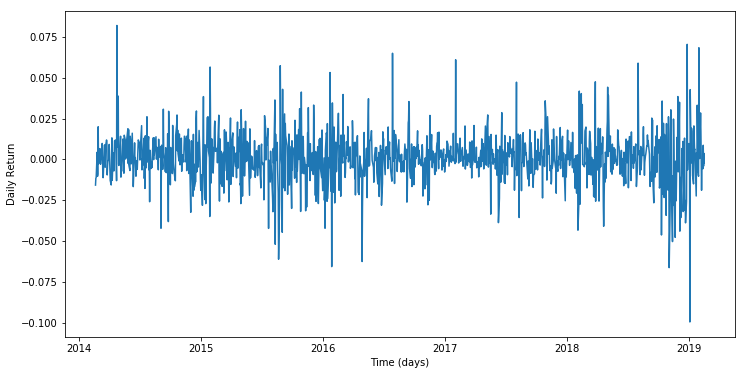

In [48]:
plt.figure(figsize=(12,6))
plt.plot(price_return);
plt.xlabel('Time (days)');
plt.ylabel('Daily Return');

Did the plot above look like white noise? How should we expect the histogram to look like?

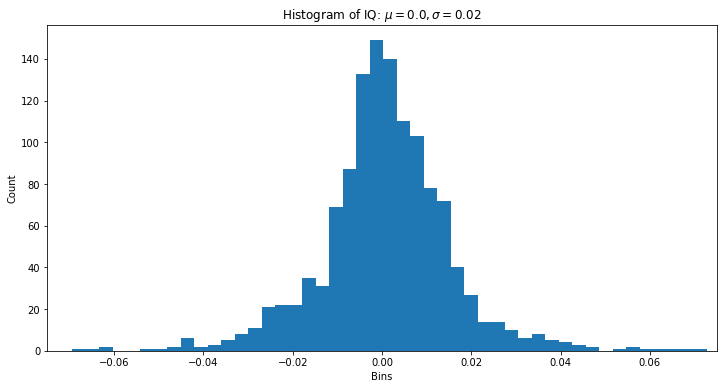

In [49]:
plt.figure(figsize=(12,6))
plt.hist(price_return, bins = 60);
plt.xlim(-0.075, 0.075)
plt.xlabel('Bins');
plt.ylabel('Count');
plt.title(r'Histogram of IQ: $\mu = $'+str(round(np.mean(price_return),2))+'$, \sigma=$'+str(round(np.std(price_return),2)));

IS APPLE STOCK A RANDOM WALK?? ... MAYBE!

Need to prove one other thing which is if past returns are correlated to each other, this is known as autocorrelation. This is a bit of a hard topic for beginners but I provide code below how to check autocorrelation.

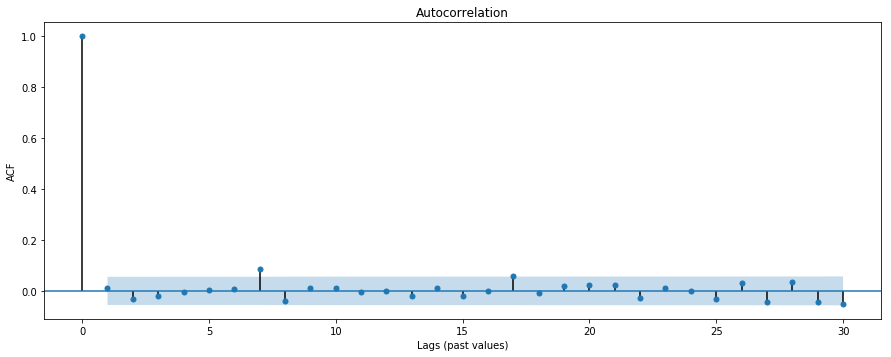

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(211)
fig = plot_acf(price_return, lags=30, ax=ax1)
plt.ylabel('ACF');
plt.xlabel('Lags (past values)');

Long story short there is no correlation between past returns with future ones. 

If there were then the blue dots should be outside and further away from the blue shaded area; closer to 1 or -1 means a higher correlation (again this takes some mathematical explanation).

**Conclusion: it is a random walk.**
    
Thus there is no way to trade based on past prices! Must then trade on other data that moves the stock such as fundamentals, announcements, or news.